In [1]:
#from model_phantom_noise import *
from model_phantom_DB import *
from linares_plot import * 
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'png' ## 'svg'

%load_ext autoreload
%autoreload 2


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


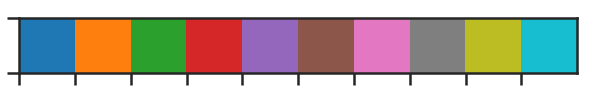

In [2]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(100/2) ;


nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+57) )/360)
p_dist2 = int((N * (90+170) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [40]:

def heatmap_rate_ph(RE, time_simulation, order2, angle_separation, target_onset, 
                 distractor_onset, pres_period, ON_OFF, save_name=False):
    #pal_cyan = sns.color_palette("viridis")
    
    dims=np.shape(RE)
    dimN = dims[0]
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(RE, cmap="cividis", vmin=0, vmax=20,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 10, 20], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(20)
    ax.figure.axes[-1].tick_params(labelsize=20)
    ax.axis('tight')
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    p_stim = (180+angle_separation/2) * (dims[0]/360)
    p_dist = (180-angle_separation/2) * (dims[0]/360) 

    stimon = target_onset/2
    stimoff = (target_onset + pres_period) / 2
    diston = distractor_onset/2
    distoff = (distractor_onset + pres_period) / 2


    #plt.gca().plot([stimon, stimon+400], [p_stim, p_stim], ls='--', color ='blue', linewidth=1) 
    #plt.gca().plot([diston, diston+400], [p_dist, p_dist], ls='--', color ='red', linewidth=1) 

    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, int(dimN/4), int(dimN/2),  int(3*dimN/4), int(dimN) ])
    plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)

    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(dimN+60, -45)

    ###

    ##line stims  
    c1='k'
    c2='k'
    
    if order2==False:
        s1on=stimon
        s1off=stimoff
        s2on=diston
        s2off=distoff
        c1='darkorange'
    else:
        s1on=diston
        s1off=distoff
        s2on=stimon
        s2off=stimoff
        c2='darkorange'

    plt.plot([0, s1on], [-15, -15], linestyle='--', color='k', linewidth=2)
    plt.plot([s1on, s1on], [-15, -40], linestyle='--', color=c1, linewidth=2)
    plt.plot([s1on, s1off], [-40, -40], linestyle='--', color=c1, linewidth=2)
    plt.plot([s1off, s1off], [-15, -40], linestyle='--', color=c1, linewidth=2)
    plt.plot([s1off, s2on], [-15, -15], linestyle='--', color='k', linewidth=2)
    plt.plot([s2on, s2on], [-15, -40],linestyle='-', color=c2, linewidth=2)
    plt.plot([s2on, s2off], [-40, -40],linestyle='-', color=c2, linewidth=2)
    plt.plot([s2off, s2off], [-15, -40], linestyle='-', color=c2, linewidth=2)
    plt.plot([s2off, dims[1]], [-15, -15], linestyle='-', color='k', linewidth=2)
    
    ###
    if ON_OFF=='ON':
        plt.text(dims[1]-300, 450, 'ON', weight="bold", fontsize=28, color='white');
    else:
        plt.text(dims[1]-300, 450, 'OFF', weight="bold", fontsize=28, color='white');
        

    
    #time
    x1sec = 1000 * dims[1] / time_simulation
    plt.plot([dims[1]-x1sec, dims[1]], [dimN+30, dimN+30], 'k-', linewidth=2)
    plt.text(dims[1]-300, 600, '1s', fontsize=20);
    
    
    if save_name!=False:
        plt.savefig(save_name + '.png', transparent=True) ##to save it transparent
    plt.show()

## Example

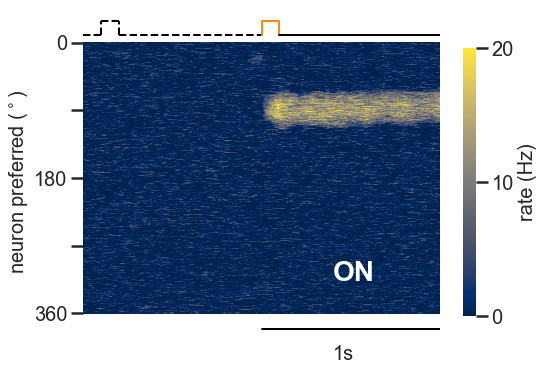

In [44]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

phantom_on= model(totalTime=2000, targ_onset_1=10000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=100, phantom_on = 'on', phnatom_duration=300)

heatmap_rate_ph(flipud(phantom_on[4]), time_simulation=2000, order2=True, 
              angle_separation=55, target_onset=1000, distractor_onset=100, 
              pres_period=100, ON_OFF='ON', save_name=False)

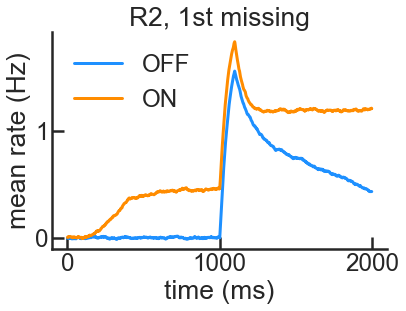

In [39]:
firing_all_on=np.load('f_on_200.npy')
firing_all_off=np.load('f_off_200.npy')

%config InlineBackend.figure_format = 'png' ## 'svg'

plt.plot(np.mean(firing_all_off, axis=0), label='OFF', color=c_off )
plt.plot(np.mean(firing_all_on, axis=0), label='ON', color=c_on )
plt.legend(frameon=False)
plt.title('')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticks([0, 500, 1000])
plt.gca().set_xticklabels(['0', '1000', '2000'], rotation=0)
plt.title('R2, 1st missing')
plt.ylabel('mean rate (Hz)')
plt.xlabel('time (ms)');